<a href="https://colab.research.google.com/github/AryanShukla2006/Binary-Classification-Model/blob/main/02_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#02. Neural Network classification with PyTorch


## 1. Make classification of data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)      # same as random seed

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print("first five samples of X:",X[:5],"\n")
print("first five samples of y:",y[:5])

first five samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] 

first five samples of y: [1 1 1 1 0]


In [ ]:
# Make a DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


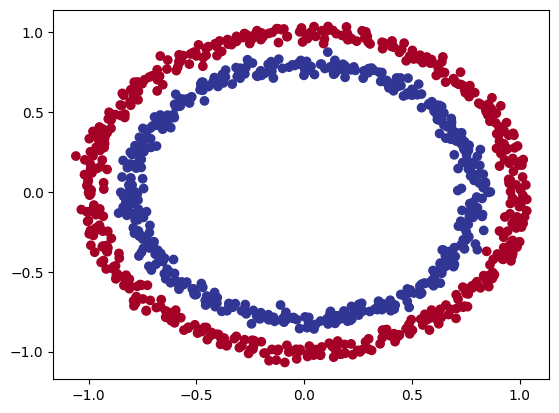

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c = y,
            cmap=plt.cm.RdYlBu);

Note: The data we are working with is reffered to a toy dataset
it is small enough to experiment and sizable enough to practice

### 1.1 Check imput and output shapes

In [ ]:
X.shape, y.shape        # these are arrays

((1000, 2), (1000,))

In [ ]:
# view the first exaples of features and labels
X_sample = X[0]
y_sample = y[0]

print(X_sample, y_sample)
print("shape:", X_sample.shape, y_sample.shape)

[0.75424625 0.23148074] 1
shape: (2,) ()


 we have 2 features of X and no features of y so y is a scalar

### Turn data into tensors and create train and test splits

In [ ]:
X.dtype

dtype('float64')

In [ ]:
# turn data into tensors
import torch
from torch import nn

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X)

torch.Tensor

In [ ]:
# Split data in training and test set 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)

In [ ]:
len(X_train), len(X_test)

(800, 200)

## 2. Building a model

Lets build a model to classify our blue and red dots

To do so , we want to:
1. Setup device diagnostic code to run code on gpu
2. Construct a model (by subclassing "nn.module")
3. Define a loss funtion and an optimizer
4. create a train and test loop

In [ ]:
# Make device agnostic mode
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now that we have setup agnostic code we build a model that

1. Subclasses nn.module
2. Create 2 nn.lineear() layers that are capable of handling our data
3. Defines a forward() method that creates the forward pass
4. Instiate an instance of our model class and send it to device

In [ ]:
# Construct a model that Subclasses nn.module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2 Create 2 nn.linear layers
    self.layers_1 = nn.Linear(in_features=2, out_features=5)
    self.layers_2 = nn.Linear(in_features=5, out_features=1)       #search on chat gpt this code if you are confused

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

#instantiating an instance of our model
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layers_1): Linear(in_features=2, out_features=5, bias=True)
  (layers_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Lets recreate the model using nn.sequential
# This code generated the same model but we dont have to manually create the forward pass
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653]])),
             ('0.bias', tensor([ 0.1282, -0.2518,  0.3691,  0.3716,  0.2644])),
             ('1.weight',
              tensor([[-0.0786, -0.1184,  0.0478, -0.0790, -0.1333]])),
             ('1.bias', tensor([0.2859]))])

In [ ]:
# Making predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of Predictions:{len(untrained_preds)}, Shape:{untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}, shape: {X_test.shape}")
print("first 10 predictions:",torch.round(untrained_preds[:10]))

Length of Predictions:200, Shape:torch.Size([200, 1])
Length of test samples : 200, shape: torch.Size([200, 2])
first 10 predictions: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])


In [ ]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 2.1 Setup loss function and optimizer

Which loss function or optimizer should we use is dependent upon the type of model so

* for linear regression model we use MAE or MSE
* for binary classification we use Binary cross entropy

And for optimizer the most common are SGD and Adam

* for the loss function we use "torch.nn.BCEWithLogitsLoss()"

In [ ]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()      # This has the built in sigmoid activation(logits) function in it

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [ ]:
# Calculate accuracy of this model
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


## 3. Train model

to train our model we build a training loop

* Forward Pass
* calculate the loss
* optimizer zero grad
* loss backwards (backpropogation)
* optimizer step (gradient descent)

### 3.1 Going from raw logits --> prediction probabilities --> prediction labels

our model outputs are going to be * Raw Logits**

we can convert these logits **into prediction probabilities** by passing then to the activation function

then we can convert our models prediction probabilities to ** predictions labals** by either using rounding off or taking argmax()

In [ ]:
# view the first 5 outputs of forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3265],
        [0.3140],
        [0.2919],
        [0.3365],
        [0.1853]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# using the sigmoid activation function to turn logits into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5809],
        [0.5779],
        [0.5725],
        [0.5834],
        [0.5462]])

In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

### 3.2 Building a training and testing loop

In [ ]:
torch.cuda.manual_seed(42)

# we first set our epoch or number of iterations for our loop
epochs = 100

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building the loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropogation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate the test loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_logits)

    # Print the loss and accuracy
    if epoch % 10 == 0 :
      print(f"epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}%", "\n" )
      print(f"test_Loss: {test_loss:.5f} | test_Acc: {test_acc:.2f}%", "\n" )

epoch: 0 | Loss: 0.70175 | Acc: 50.00% 

test_Loss: 0.70198 | test_Acc: 0.00% 

epoch: 10 | Loss: 0.69749 | Acc: 50.00% 

test_Loss: 0.69785 | test_Acc: 0.00% 

epoch: 20 | Loss: 0.69541 | Acc: 50.00% 

test_Loss: 0.69580 | test_Acc: 0.00% 

epoch: 30 | Loss: 0.69438 | Acc: 50.50% 

test_Loss: 0.69477 | test_Acc: 0.00% 

epoch: 40 | Loss: 0.69385 | Acc: 57.38% 

test_Loss: 0.69425 | test_Acc: 0.00% 

epoch: 50 | Loss: 0.69357 | Acc: 53.00% 

test_Loss: 0.69397 | test_Acc: 0.00% 

epoch: 60 | Loss: 0.69341 | Acc: 52.12% 

test_Loss: 0.69383 | test_Acc: 0.00% 

epoch: 70 | Loss: 0.69331 | Acc: 51.38% 

test_Loss: 0.69375 | test_Acc: 0.00% 

epoch: 80 | Loss: 0.69325 | Acc: 51.38% 

test_Loss: 0.69371 | test_Acc: 0.00% 

epoch: 90 | Loss: 0.69320 | Acc: 51.50% 

test_Loss: 0.69369 | test_Acc: 0.00% 



## 4. Make predictions and evaluate our model

It look like our model is not learning so lets visualize
to do so we are going to import plot_decision_boundaries

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


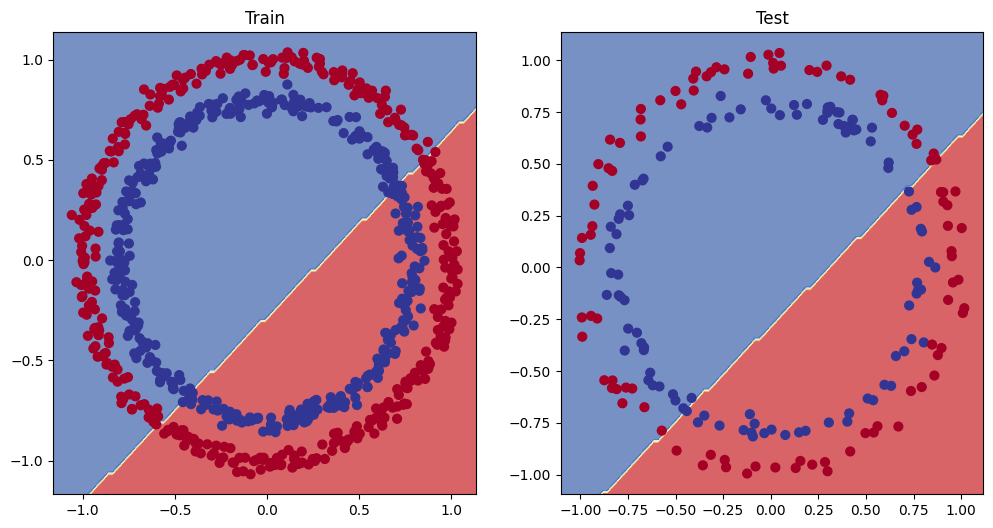

In [ ]:
# Plot decision boundary of the  model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perpective)

* Add more layers - give the model more complex data to learn
* Add more hidden units - go from 5 output featured to 10 output units
* Fit for longer
* Changing the active function
* Change the **learning rate**
* Change the loss function

these options deal directly with the model rather than the data

These are the parameters within the models that we can change so these are called **Hyperparameters**

so we are now
* adding more hidden features : 5->10
* increase the number of layers : 2->3
* Increase the number of epochs : 100 -> 1000


In [ ]:
class CircleModeLV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features=10)
    self.layer_3 = nn.Linear(in_features = 10, out_features=1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)           # updates z through each hidden layer   and return z or
    return self.layer_3(self.layer_2(self.layer_1(x)))        # this way is better as it increases the speed


model_1 = CircleModeLV1().to(device)
model_1

CircleModeLV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

 Now that we have made some improvements
 Now we are building the training and testing loop again

In [ ]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Increase the number of epochs
epochs = 1000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # Forward pass
  y_logits = model_1(X_train).squeeze()                # Produce raw logits
  y_pred = torch.round(torch.sigmoid(y_logits))             # convert logits into labels

  # Calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  # backpropogation
  loss.backward()

  # optimizer step (gradient descent)
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out whats happening
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}%", "\n" )
    print(f"test_Loss: {test_loss:.5f} | test_Acc: {test_acc:.2f}%", "\n" )

epoch: 0 | Loss: 0.70616 | Acc: 50.00% 

test_Loss: 0.70328 | test_Acc: 50.00% 

epoch: 100 | Loss: 0.70431 | Acc: 50.00% 

test_Loss: 0.70154 | test_Acc: 50.00% 

epoch: 200 | Loss: 0.70272 | Acc: 50.00% 

test_Loss: 0.70006 | test_Acc: 50.00% 

epoch: 300 | Loss: 0.70137 | Acc: 50.00% 

test_Loss: 0.69881 | test_Acc: 50.00% 

epoch: 400 | Loss: 0.70021 | Acc: 50.00% 

test_Loss: 0.69776 | test_Acc: 50.00% 

epoch: 500 | Loss: 0.69921 | Acc: 50.00% 

test_Loss: 0.69687 | test_Acc: 50.00% 

epoch: 600 | Loss: 0.69836 | Acc: 50.00% 

test_Loss: 0.69611 | test_Acc: 50.00% 

epoch: 700 | Loss: 0.69763 | Acc: 50.00% 

test_Loss: 0.69548 | test_Acc: 50.00% 

epoch: 800 | Loss: 0.69701 | Acc: 50.00% 

test_Loss: 0.69495 | test_Acc: 50.00% 

epoch: 900 | Loss: 0.69648 | Acc: 50.00% 

test_Loss: 0.69451 | test_Acc: 50.00% 



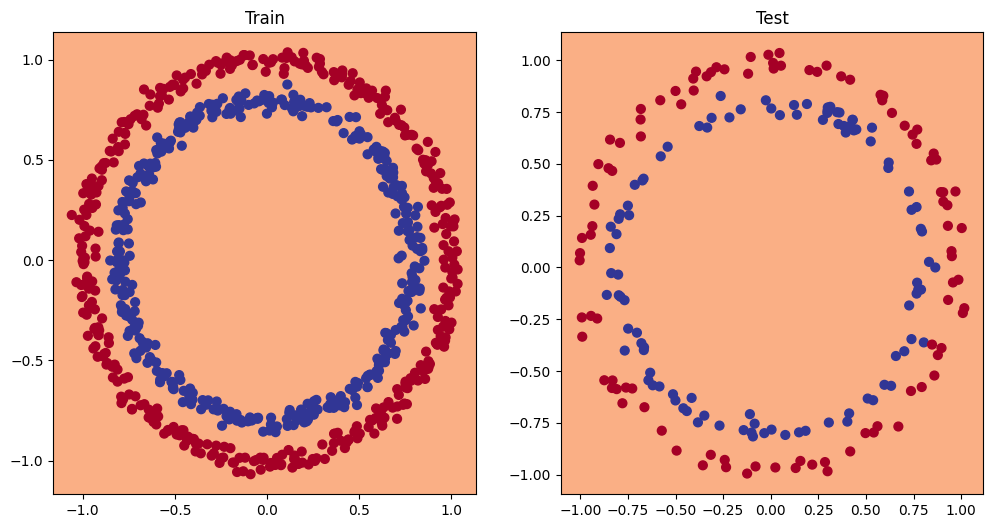

In [ ]:
# plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train ,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test ,y_test)

### 5.1 Preparing our model to see if our model can fit a straight line

we use a smaller problem to trouble shoot a larger problem

In [ ]:
# create the linear regression model data
weight = 0.7
bias = 0.3

X_regression = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

#Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))

X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression)

80

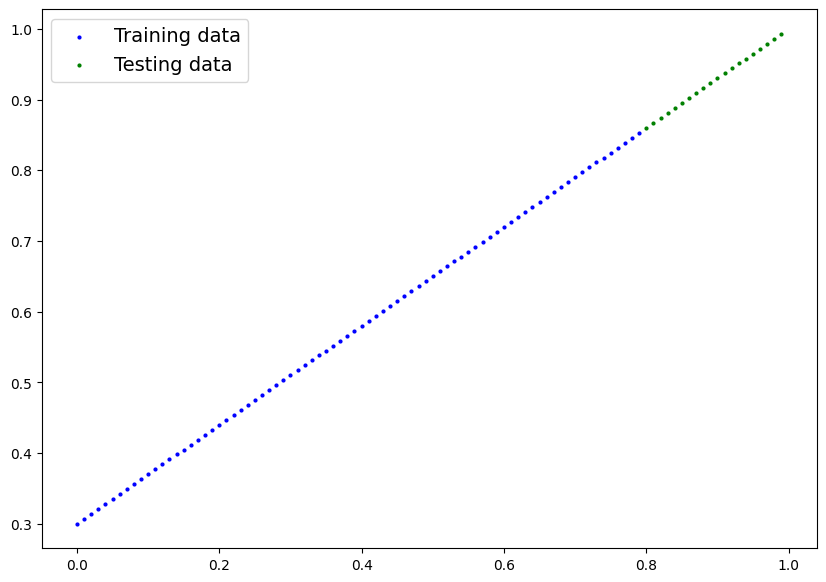

In [ ]:
plot_predictions(train_data=X_train_regression,
                train_labels=y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression)

In [ ]:
### 5.3 Adjusting model_1 to fit a straight line
model_1

CircleModeLV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Smae arcgitecture as model_w (but using sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2


Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.001)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  # Training
  model_2.train()

  y_pred = model_2(X_train_regression)

  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print whats happening
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | Loss: {loss:.5f}",  "\n" )
    print(f"test_Loss: {test_loss:.5f}", "\n" )




epoch: 0 | Loss: 0.75986 

test_Loss: 0.94965 

epoch: 100 | Loss: 0.40272 

test_Loss: 0.54029 

epoch: 200 | Loss: 0.05876 

test_Loss: 0.13480 

epoch: 300 | Loss: 0.01461 

test_Loss: 0.03342 

epoch: 400 | Loss: 0.00308 

test_Loss: 0.00008 

epoch: 500 | Loss: 0.00309 

test_Loss: 0.00012 

epoch: 600 | Loss: 0.00309 

test_Loss: 0.00018 

epoch: 700 | Loss: 0.00299 

test_Loss: 0.00011 

epoch: 800 | Loss: 0.00299 

test_Loss: 0.00016 

epoch: 900 | Loss: 0.00289 

test_Loss: 0.00011 



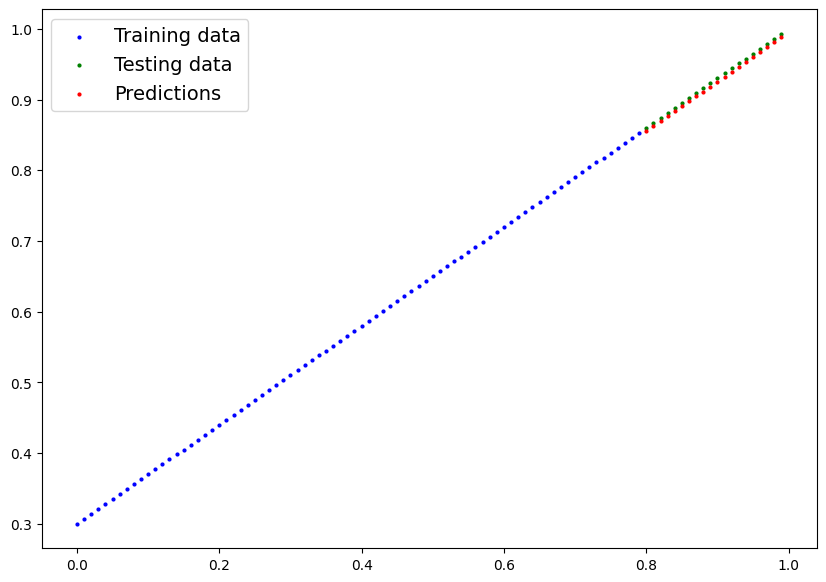

In [ ]:
# Making predictions
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

### Our model works
even though this was a simpler problem but it works perfectly

---


 so our model runs for linear data but not for non linear data

---

but not for non-linear data so we need non-linearity for the binary classification model

## Introducing Non-linearity
"What paterns could you draw an infinite amounts of linear and non-linear function"  **Everything**

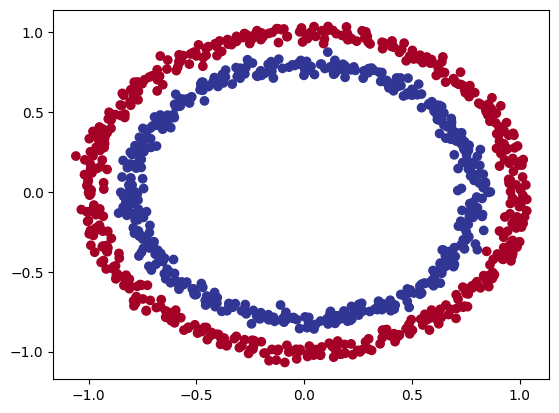

In [ ]:
# Make and plot the data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:,0] ,X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then train test splits
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

import torch
from sklearn.model_selection import train_test_split


#Split data in training and test set 80/20
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)
len(X_train)
print(X[:5], y[:5])

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) tensor([1., 1., 1., 1., 0.])


### 6.2 Bilding a model with non-linearity

In [ ]:
# Build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()    #ReLU is a non linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr = 0.1)

### Training the model

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# device agnostic code
X_train,y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000
for epoch in range(epochs):
  model_3.train()

  # Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate the test loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_logits)

    # Print the loss and accuracy
    if epoch % 100 == 0 :
      print(f"epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}%", "\n" )
      print(f"test_Loss: {test_loss:.5f} | test_Acc: {test_acc:.2f}%", "\n" )


epoch: 0 | Loss: 0.37023 | Acc: 97.75% 

test_Loss: 0.40568 | test_Acc: 0.00% 

epoch: 100 | Loss: 0.25428 | Acc: 99.00% 

test_Loss: 0.30300 | test_Acc: 0.00% 

epoch: 200 | Loss: 0.17162 | Acc: 99.50% 

test_Loss: 0.22089 | test_Acc: 0.00% 

epoch: 300 | Loss: 0.12177 | Acc: 99.62% 

test_Loss: 0.16500 | test_Acc: 0.00% 

epoch: 400 | Loss: 0.09116 | Acc: 99.88% 

test_Loss: 0.12732 | test_Acc: 0.00% 

epoch: 500 | Loss: 0.07097 | Acc: 99.88% 

test_Loss: 0.10316 | test_Acc: 0.00% 

epoch: 600 | Loss: 0.05771 | Acc: 99.88% 

test_Loss: 0.08670 | test_Acc: 0.00% 

epoch: 700 | Loss: 0.04851 | Acc: 99.88% 

test_Loss: 0.07473 | test_Acc: 0.00% 

epoch: 800 | Loss: 0.04175 | Acc: 99.88% 

test_Loss: 0.06582 | test_Acc: 0.00% 

epoch: 900 | Loss: 0.03628 | Acc: 99.88% 

test_Loss: 0.05975 | test_Acc: 0.00% 



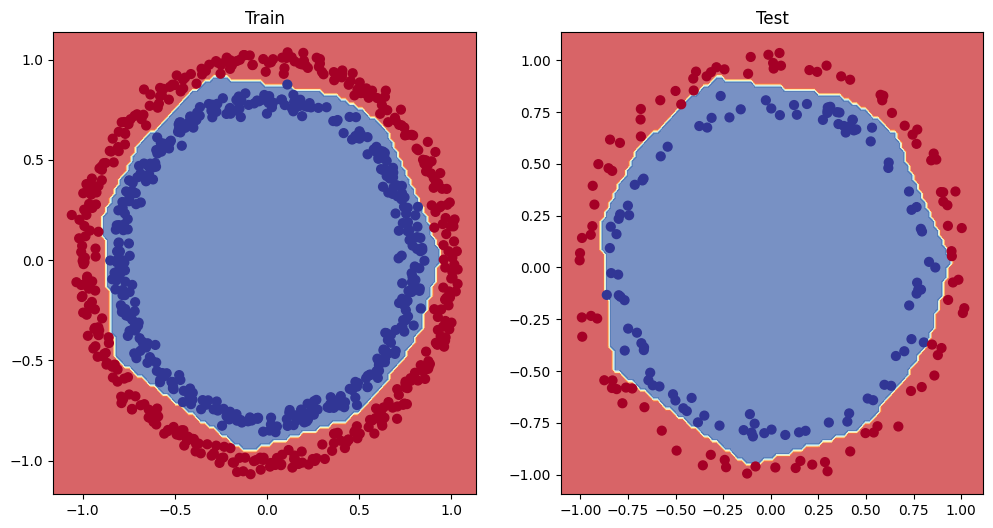

In [ ]:
# plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train ,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test ,y_test)

### 6.4 Evaluating then non-linear model

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:5], y_test[:5]

(tensor([1., 0., 1., 0., 1.]), tensor([1., 0., 1., 0., 1.]))